# Problem Set 4

### Learning Objective:

- Create Python code to automate a given task.

### Overview:

This problem set assesses your algorithmic thinking, which is the focus of weeks 3 and 4. For each problem, you are required to go through all four steps of algorithmic thinking. See the sample solutions to Exercises 3.6, 4.2, 4.3 an 4.5 for examples of the desired format of your responses.

### Grading

There are three possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for 100% mastery of the material, as the little details matter a lot in programming. 

| Grade | Description |
|--|--|
| 5 out of 5 | Perfect submission with no significant errors. | 
| 4 out of 5 | Near perfect submission with one or more significant errors. |
| 2 out of 5 | Apparent effort but far from perfect. |

## Q1. Optimal Stocking Level

Write a function named `optBaseStock` with four input arguments:

- `levelList`: a list of possible stocking levels to optimize over (which can be a `range` instead of a `list`).
- `demandList`: a list of demand scenarios. 
- `underage`: the unit cost of having too little inventory to meet demand.
- `overage`: the unit cost of having too much inventory.

For each possible stocking level, the function should compute the average inventory cost, which is defined as the average over all demand scenarios of the total underage cost plus the total overage cost. For example, if the stocking level is 10, the demand scenarios are `[6,12,14]`, the underage cost is 9 and the overage is 5, then

- The inventory cost for the scenario `demand=6` is $(10-6)\times 5=20$, because the stocking level is 4 units too high. (The overage cost of 5/unit is applied when the inventory is too high.)
- The inventory cost for the scenario `demand=12` is $(12-10)\times 9=18$, because the stocking level is 2 units too low. (The underage cost of 9/unit is applied when the inventory is too low.) 
- The inventory cost for the scenario `demand=14` is $(14-10)\times 9=36$, because the stocking level is 4 units too low. 

The average inventory cost for stocking level 10 is $(20+18+36)/3=74/3\approx 24.67$.  

The function should return two objects:

- `bestLevel`: the stocking level in `levelList` that achieves the minimum average inventory cost (if there is a tie, return the smallest stocking level that yields the minimum cost).
- `avCost`: a dictionary that maps each stocking level to the corresponding average inventory cost.

**Sample run:**

```python
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost=optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)
```

**Correct output:**

```
bestLevel 20
avCost {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}
```

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

Calculate the level of inventory that will cause the lowest total cost.

**Step 2. Decompose** (Write your instructions in this Markdown cell)

**A.** 
    
   For each element in levelList:
   
   a. If the inventory is lower than than demand, cost equal to the shortage multiply by ungerage.
       
   b. If the inventory is exceed the demand, cost equal to the exceed inventory multiply by overage.
       
   c. If the inventory is equal to demand, there is no cost.
       
   Assign the cost into list called "demand_cost"

**B.** 
    
   Find the average cost in "demand_cost". This is the total cost of each element in levelList
   
**C.** 
   
   Insert the element in levelList and total cost into dictionary named "avCost" and repeat step A - C for each element in levelList
   
**D.** 
   
   Find the lowest cost in the "avCost" then assign key of that cost to parameter "bestLevel"

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [1]:
import numpy as np

In [2]:
# A. 
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3

for i in levelList:
    demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
    print(demand_cost)

[100, 180, 50, 200, 160, 300, 150, 30, 50, 100]
[50, 130, 0, 150, 110, 250, 100, 6, 0, 50]
[0, 80, 15, 100, 60, 200, 50, 21, 15, 0]
[15, 30, 30, 50, 10, 150, 0, 36, 30, 15]
[30, 6, 45, 0, 12, 100, 15, 51, 45, 30]
[45, 21, 60, 15, 27, 50, 30, 66, 60, 45]


In [3]:
# B. 
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3

for i in levelList:
    demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
    print(np.average(demand_cost))

132.0
84.6
54.1
36.6
33.4
41.9


In [4]:
# C. 
demandList = [10,18,5,20,16,30,15,3,5,10]
levelList = range(0,30,5)
underage = 10
overage = 3
avCost = {}

for i in levelList:
    demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
    avCost[i] = np.average(demand_cost)

avCost

{0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}

In [5]:
# D.
demandList = [10,18,5,20,16,30,15,3,5,10]
levelList = range(0,30,5)
underage = 10
overage = 3
avCost = {}

for i in levelList:
    demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
    avCost[i] = np.average(demand_cost)

bestLevel = list(avCost.keys())[list(avCost.values()).index(min(avCost.values()))]

**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [6]:
# Version for debugging: with intermediate printing and no function encapsulation
demandList = [10,18,5,20,16,30,15,3,5,10]
levelList = range(0,30,5)
underage = 10
overage = 3
avCost = {}

for i in levelList:
    demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
    avCost[i] = np.average(demand_cost)

bestLevel = list(avCost.keys())[list(avCost.values()).index(min(avCost.values()))]

In [7]:
# Final code: removing intermediate printing and encapuslating in a function
def optBaseStock(levelList,demandList,underage,overage):
    
    avCost = {}

    for i in levelList:
        demand_cost = [abs((i-d)*underage) if i < d else (i-d)*overage for d in demandList]
        avCost[i] = np.average(demand_cost)

    bestLevel = list(avCost.keys())[list(avCost.values()).index(min(avCost.values()))]
    
    return bestLevel, avCost

In [8]:
# Sample run
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,avCost = optBaseStock(levelList,demandList,underage,overage)
print('bestLevel:',bestLevel)
print('avCost:',avCost)

bestLevel: 20
avCost: {0: 132.0, 5: 84.6, 10: 54.1, 15: 36.6, 20: 33.4, 25: 41.9}


The following code illustrates how the results might be graphed as in Exercise 4.3.

**Remember that due to a bug in Jupyter notebook, the first graph might need to be run twice in order to show.**

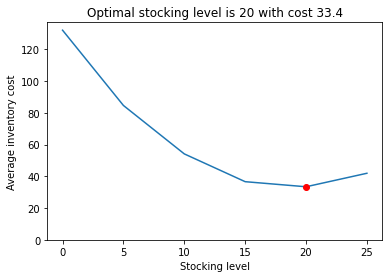

In [9]:
demandList=[10,18,5,20,16,30,15,3,5,10]
levelList=range(0,30,5)
underage=10
overage=3
bestLevel,cost=optBaseStock(levelList,demandList,underage,overage)

import matplotlib.pyplot as plt
levelList=sorted(levelList)
costList=[cost[level] for level in levelList]
plt.plot(levelList,costList)
plt.plot([bestLevel],[cost[bestLevel]],'ro')
plt.title(f'Optimal stocking level is {bestLevel} with cost {round(cost[bestLevel],2)}')
plt.xlabel('Stocking level')
plt.ylabel('Average inventory cost')
plt.ylim(bottom=0)
plt.show()

## Q2. Simulating Availabilities of Hospital Beds

One challenge in health care operations is to forecast the number of hospital beds that are available at a given time, since patients admitted in the past may stay for several days and the number of beds are limited. If no more beds are available, then incoming patients may need to be turned away.

Write a function called `admissionSimulation` with three input arguments:

- `demandList`: a list of positive integers representing the number of incoming patients who need a hospital bed in each day. (The first number corresponds to day 0, the second number to day 1, and so on.)
- `beds`: a positive integer representing the total number of hospital beds available.
- `stay`: a positive integer representing the number of days each admitted patient will stay. If `stay=1`, then every admitted patient leaves before any incoming patients arrive the next day. If `stay=2`, then each patient admitted on day $t$ will occupy a bed also for day $t+1$, and leave before incoming patients arrive on day $t+2$.

The function should return a list `admissionRecord`, corresponding to the number of incoming patients admitted on each day. 

**Sample run 1:**

```python
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    1	    1
1	    2	    1
2	    1	    1
3	    0	    0
4	    2	    2
5	    3	    0
```

**Sample run 2:**

```python
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day	  Demand   Admitted
0	    5	    5
1	    8	    2
2	    6	    0
3	    8	    5
4	    4	    2
5	    4	    0
6	    8	    5
7	    6	    2
8	    1	    0
```

**Sample run 3:**

```python
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')
```

**Correct output:**

```
Day      Demand   Admitted
0	    5    	5
1	    8	    2
2	    6	    0
3	    4	    4
4	    4	    3
5	    4	    0
6	    8	    4
7	    1	    1
8	    3	    2
```

**Hint:** In Step 2, you want to create a table. The above tables are insufficient to carry through the logic, as you also need to keep track of the number of discharges at the beginning of each day, as well as the number of available beds before new patients arrive.

### Applying Algorithmic Thinking:

**Step 1. Understand** (Write your summary of the task in this cell:)

Calculate the number of admitted patient for each day

**Step 2. Decompose** (Write your instructions in this Markdown cell)



**A.** 

At day 0, set avalilable_bed = beds, admitted = the lowest number between demand and beds 

**B.** 

Next day, set avalilable_bed = avalilable_bed in previous day - admitted patient in the previous day + admitted patient in day (t - stay), admitted = the lowest number between demand and avalilable_bed

**C.** 

Append the admitted in each day into the list. Repeat step a and b for each day in demand list

**Step 3. Analyze** (Write code fragments in separate code cells to implement the trickiest steps)

In [10]:
# A. 
demandList = [1,2,1,0,2,3]
beds = 2
stay = 2
admittedList = []

for i in range(len(demandList)):
    if i == 0:
        available_bed = beds
        admitted = min(available_bed,demandList[i])
    admittedList.append(admitted)

admittedList

[1, 1, 1, 1, 1, 1]

In [11]:
# B.
demandList = [1,2,1,0,2,3]
beds = 2
stay = 2
admittedList = []

for i in range(len(demandList)):
    if i == 0:
        available_bed = beds
        admitted = min(available_bed,demandList[i])
    elif i < stay:
        available_bed = max(available_bed - admittedList[-1],0)
        admitted = min(available_bed,demandList[i])
    else:
        available_bed = max(available_bed - admittedList[-1] + admittedList[stay*-1],0)
        admitted = min(available_bed,demandList[i])

    admittedList.append(admitted)

admittedList

[1, 1, 1, 0, 2, 0]

**Step 4. Synthesize** (Combine your code fragments from Step 3, but do so in an incremental fashion and print intermediate results)

In [12]:
# Version for debugging: with intermediate printing and no function encapsulation
demandList = [5,8,6,8,4,4,8,6,1]
beds = 7
stay = 3
admittedList = []

for i in range(len(demandList)):
    if i == 0:
        available_bed = beds
        admitted = min(available_bed,demandList[i])
    elif i < stay:
        available_bed = max(available_bed - admittedList[-1],0)
        admitted = min(available_bed,demandList[i])
    else:
        available_bed = max(available_bed - admittedList[-1] + admittedList[stay*-1],0)
        admitted = min(available_bed,demandList[i])
    print(available_bed)
    admittedList.append(admitted)
    print(admittedList)

7
[5]
2
[5, 2]
0
[5, 2, 0]
5
[5, 2, 0, 5]
2
[5, 2, 0, 5, 2]
0
[5, 2, 0, 5, 2, 0]
5
[5, 2, 0, 5, 2, 0, 5]
2
[5, 2, 0, 5, 2, 0, 5, 2]
0
[5, 2, 0, 5, 2, 0, 5, 2, 0]


In [13]:
# Final code: removing intermediate printing and encapuslating in a function
def admissionSimulation(demandList,beds,stay):

    admittedList = []

    for i in range(len(demandList)):
        if i == 0:
            available_bed = beds
            admitted = min(available_bed,demandList[i])
        elif i < stay:
            available_bed = max(available_bed - admittedList[-1],0)
            admitted = min(available_bed,demandList[i])
        else:
            available_bed = max(available_bed - admittedList[-1] + admittedList[stay*-1],0)
            admitted = min(available_bed,demandList[i])
        admittedList.append(admitted)
    return admittedList

In [14]:
# Sample run 1
demandList=[1,2,1,0,2,3]
beds=2
stay=2
admissionRecord=admissionSimulation(demandList,beds,stay)

admissionRecord
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	1	1
1	2	1
2	1	1
3	0	0
4	2	2
5	3	0


In [15]:
# Sample run 2
demandList=[5,8,6,8,4,4,8,6,1]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	8	5
4	4	2
5	4	0
6	8	5
7	6	2
8	1	0


In [16]:
# Sample run 3
demandList=[5,8,6,4,4,4,8,1,3]
beds=7
stay=3
admissionRecord=admissionSimulation(demandList,beds,stay)
print(f'Day\tDemand\tAdmitted')
for i in range(len(demandList)):
    print(f'{i}\t{demandList[i]}\t{admissionRecord[i]}')

Day	Demand	Admitted
0	5	5
1	8	2
2	6	0
3	4	4
4	4	3
5	4	0
6	8	4
7	1	1
8	3	2
